#### import neccessary libraries ####

In [114]:
import os
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as pxd
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA


#### once read file ####

In [115]:
df=pd.read_csv("sales_data_sample.csv",encoding='unicode_escape')

In [116]:
df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       2823 non-null   int64  
 1   QUANTITYORDERED   2823 non-null   int64  
 2   PRICEEACH         2823 non-null   float64
 3   ORDERLINENUMBER   2823 non-null   int64  
 4   SALES             2823 non-null   float64
 5   ORDERDATE         2823 non-null   object 
 6   STATUS            2823 non-null   object 
 7   QTR_ID            2823 non-null   int64  
 8   MONTH_ID          2823 non-null   int64  
 9   YEAR_ID           2823 non-null   int64  
 10  PRODUCTLINE       2823 non-null   object 
 11  MSRP              2823 non-null   int64  
 12  PRODUCTCODE       2823 non-null   object 
 13  CUSTOMERNAME      2823 non-null   object 
 14  PHONE             2823 non-null   object 
 15  ADDRESSLINE1      2823 non-null   object 
 16  ADDRESSLINE2      302 non-null    object 


#### PREPROCCESSING ####

 ORDERDATE to pandas Datetime form

In [118]:
df['ORDERDATE']=pd.to_datetime(df['ORDERDATE'])
df['ORDERDATE'] =pd.to_datetime(df['ORDERDATE']).astype(np.int64)

#### check null values ####

In [119]:
df.isnull().sum()

ORDERNUMBER            0
QUANTITYORDERED        0
PRICEEACH              0
ORDERLINENUMBER        0
SALES                  0
ORDERDATE              0
STATUS                 0
QTR_ID                 0
MONTH_ID               0
YEAR_ID                0
PRODUCTLINE            0
MSRP                   0
PRODUCTCODE            0
CUSTOMERNAME           0
PHONE                  0
ADDRESSLINE1           0
ADDRESSLINE2        2521
CITY                   0
STATE               1486
POSTALCODE            76
COUNTRY                0
TERRITORY           1074
CONTACTLASTNAME        0
CONTACTFIRSTNAME       0
DEALSIZE               0
dtype: int64

#### drop unwanted columns ####

In [120]:
to_drop = ['STATUS', 'POSTALCODE',  'TERRITORY', 'PHONE', 'CONTACTFIRSTNAME', 'CONTACTLASTNAME', 'ORDERNUMBER']
df.drop(to_drop, axis=1, inplace=True)


#### check null again ####

In [121]:
df.isnull().sum().sum()

4007

In [122]:
df.head()

,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,COUNTRY,DEALSIZE
0,30,95.70,2,2871.00,1046044800000000000,1,2,2003,Motorcycles,95,S10_1678,Land of Toys Inc.,897 Long Airport Avenue,NaN,NYC,NY,USA,Small
1,34,81.35,5,2765.90,1052265600000000000,2,5,2003,Motorcycles,95,S10_1678,Reims Collectables,59 rue de l'Abbaye,NaN,Reims,NaN,France,Small
2,41,94.74,2,3884.34,1057017600000000000,3,7,2003,Motorcycles,95,S10_1678,Lyon Souveniers,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,France,Medium
3,45,83.26,6,3746.70,1061769600000000000,3,8,2003,Motorcycles,95,S10_1678,Toys4GrownUps.com,78934 Hillside Dr.,NaN,Pasadena,CA,USA,Medium
4,49,100.00,14,5205.27,1065744000000000000,4,10,2003,Motorcycles,95,S10_1678,Corporate Gift Ideas Co.,7734 Strong St.,NaN,San Francisco,CA,USA,Medium


Concatenating 2 address columns with 1 cloumn having null values

In [123]:
df["ADDRESS"] = df["ADDRESSLINE1"].fillna(' ') + "  " + df["ADDRESSLINE2"].fillna('')   
df.drop(['ADDRESSLINE1','ADDRESSLINE2'], axis=1, inplace=True)
df.head()

,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,CITY,STATE,COUNTRY,DEALSIZE,ADDRESS
0,30,95.70,2,2871.00,1046044800000000000,1,2,2003,Motorcycles,95,S10_1678,Land of Toys Inc.,NYC,NY,USA,Small,897 Long Airport Avenue
1,34,81.35,5,2765.90,1052265600000000000,2,5,2003,Motorcycles,95,S10_1678,Reims Collectables,Reims,NaN,France,Small,59 rue de l'Abbaye
2,41,94.74,2,3884.34,1057017600000000000,3,7,2003,Motorcycles,95,S10_1678,Lyon Souveniers,Paris,NaN,France,Medium,27 rue du Colonel Pierre Avia
3,45,83.26,6,3746.70,1061769600000000000,3,8,2003,Motorcycles,95,S10_1678,Toys4GrownUps.com,Pasadena,CA,USA,Medium,78934 Hillside Dr.
4,49,100.00,14,5205.27,1065744000000000000,4,10,2003,Motorcycles,95,S10_1678,Corporate Gift Ideas Co.,San Francisco,CA,USA,Medium,7734 Strong St.


check Missing and Duplicate values

In [124]:
nan_df = df[df.isna().any(axis=1)]     # to find any null values
nan_df.head(20)

,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,CITY,STATE,COUNTRY,DEALSIZE,ADDRESS
1,34,81.35,5,2765.90,1052265600000000000,2,5,2003,Motorcycles,95,S10_1678,Reims Collectables,Reims,NaN,France,Small,59 rue de l'Abbaye
2,41,94.74,2,3884.34,1057017600000000000,3,7,2003,Motorcycles,95,S10_1678,Lyon Souveniers,Paris,NaN,France,Medium,27 rue du Colonel Pierre Avia
6,29,86.13,9,2497.77,1068508800000000000,4,11,2003,Motorcycles,95,S10_1678,Daedalus Designs Imports,Lille,NaN,France,Small,"184, chausse de Tournai"
7,48,100.00,1,5512.32,1069113600000000000,4,11,2003,Motorcycles,95,S10_1678,Herkku Gifts,Bergen,NaN,Norway,Medium,"Drammen 121, PR 744 Sentrum"
9,41,100.00,14,4708.44,1074124800000000000,1,1,2004,Motorcycles,95,S10_1678,Auto Canal Petit,Paris,NaN,France,Medium,"25, rue Lauriston"
14,45,92.83,1,4177.35,1090540800000000000,3,7,2004,Motorcycles,95,S10_1678,La Rochelle Gifts,Nantes,NaN,France,Medium,"67, rue des Cinquante Otages"
16,23,100.00,9,2597.39,1096502400000000000,3,9,2004,Motorcycles,95,S10_1678,"Toys of Finland, Co.",Helsinki,NaN,Finland,Small,Keskuskatu 45
17,41,100.00,5,4394.38,1097798400000000000,4,10,2004,Motorcycles,95,S10_1678,Baane Mini Imports,Stavern,NaN,Norway,Medium,Erling Skakkes gate 78
20,41,100.00,9,7737.93,1101254400000000000,4,11,2004,Motorcycles,95,S10_1678,Salzburg Collectables,Salzburg,NaN,Austria,Large,Geislweg 14
22,21,34.91,12,733.11,1107388800000000000,1,2,2005,Motorcycles,95,S10_1678,La Rochelle Gifts,Nantes,NaN,France,Small,"67, rue des Cinquante Otages"


here null values not found

In [125]:
df.duplicated( keep='first').sum()

0

duplicate value is zero

In [126]:
df.describe()

,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,QTR_ID,MONTH_ID,YEAR_ID,MSRP
count,2823.000000,2823.000000,2823.000000,2823.000000,2.823000e+03,2823.000000,2823.000000,2823.00000,2823.000000
mean,35.092809,83.658544,6.466171,3553.889072,1.084235e+18,2.717676,7.092455,2003.81509,100.715551
std,9.741443,20.174277,4.225841,1841.865106,1.992714e+16,1.203878,3.656633,0.69967,40.187912
min,6.000000,26.880000,1.000000,482.130000,1.041811e+18,1.000000,1.000000,2003.00000,33.000000
25%,27.000000,68.860000,3.000000,2203.430000,1.068120e+18,2.000000,4.000000,2003.00000,68.000000
50%,35.000000,95.700000,6.000000,3184.800000,1.087258e+18,3.000000,8.000000,2004.00000,99.000000
75%,43.000000,100.000000,9.000000,4508.000000,1.100693e+18,4.000000,11.000000,2004.00000,124.000000
max,97.000000,100.000000,18.000000,14082.800000,1.117498e+18,4.000000,12.000000,2005.00000,214.000000


#### data analysis ####

Q1: What is monthly sales of each financial year?

In [127]:
monthly_sales = df.groupby(['YEAR_ID','MONTH_ID'])['SALES'].sum().reset_index()
monthly_sales.head()

,YEAR_ID,MONTH_ID,SALES
0,2003,1,129753.60
1,2003,2,140836.19
2,2003,3,174504.90
3,2003,4,201609.55
4,2003,5,192673.11


Q2: What is the best year according to sales?

In [128]:
yearly_sales=df.groupby(['YEAR_ID'])['SALES'].sum().reset_index()
yearly_sales

,YEAR_ID,SALES
0,2003,3516979.54
1,2004,4724162.60
2,2005,1791486.71


Q3: Which quarter is the best for each product line?

In [129]:
quarter = df.groupby(['PRODUCTLINE']).QTR_ID.value_counts().reset_index(name='COUNTS')
quarter.head()

,PRODUCTLINE,QTR_ID,COUNTS
0,Classic Cars,4,392
1,Classic Cars,1,217
2,Classic Cars,3,183
3,Classic Cars,2,175
4,Motorcycles,4,117


Q4: What product sold the most? Why do you think it sold the most?

In [130]:
products = df.groupby(['PRODUCTLINE'])['SALES'].sum().reset_index() 
price = df.groupby(['PRODUCTLINE'])['MSRP'].min().reset_index()   # MSRP = Manufacturer’s Suggested Retail Price
result=pd.merge(products,price)
result

,PRODUCTLINE,SALES,MSRP
0,Classic Cars,3919615.66,35
1,Motorcycles,1166388.34,40
2,Planes,975003.57,49
3,Ships,714437.13,54
4,Trains,226243.47,58
5,Trucks and Buses,1127789.84,54
6,Vintage Cars,1903150.84,33


Q5: Which country has the best sales?

In [131]:
country = df.groupby(['COUNTRY'])['SALES'].sum().reset_index()
short_form = ['AUS','AUT','BEL','CAN','DNK','FIN','FRA','DEU','IRL','ITA','JPN','NOR','PHL','SGP','ESP','SWE','CHE','GBR','USA']
country['iso_alpha'] = short_form
country

,COUNTRY,SALES,iso_alpha
0,Australia,630623.10,AUS
1,Austria,202062.53,AUT
2,Belgium,108412.62,BEL
3,Canada,224078.56,CAN
4,Denmark,245637.15,DNK
5,Finland,329581.91,FIN
6,France,1110916.52,FRA
7,Germany,220472.09,DEU
8,Ireland,57756.43,IRL
9,Italy,374674.31,ITA


 Q6: Which city has the best sales? Why?

In [132]:
cities = df.groupby(['CITY'])['SALES'].sum().reset_index()
print(cities)

            CITY      SALES
0        Aaarhus  100595.55
1      Allentown  122138.14
2      Barcelona   78411.86
3        Bergamo  137955.72
4         Bergen  111640.28
..           ...        ...
68      Toulouse   70488.44
69     Tsawassen   74634.85
70     Vancouver   75238.92
71    Versailles   64834.32
72  White Plains   85555.99

[73 rows x 2 columns]


Q7: Who was the top customer?

In [133]:
top_customer = df.groupby(['CUSTOMERNAME']).sum().sort_values('SALES', ascending = False).head(5)
top_customer = top_customer[['SALES']].round(3) 
top_customer.reset_index(inplace = True) 
top_customer.head()

,CUSTOMERNAME,SALES
0,Euro Shopping Channel,912294.11
1,Mini Gifts Distributors Ltd.,654858.06
2,"Australian Collectors, Co.",200995.41
3,Muscle Machine Inc,197736.94
4,La Rochelle Gifts,180124.90


####  Exploratory Data Analysis ####

C:\Users\sabeer\AppData\Local\Temp\ipykernel_5508\3567598715.py:11: UserWarning: Glyph 132 (\x84) missing from current font.
  plt.tight_layout()
C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\events.py:93: UserWarning: Glyph 132 (\x84) missing from current font.
  func(*args, **kwargs)
C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 132 (\x84) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


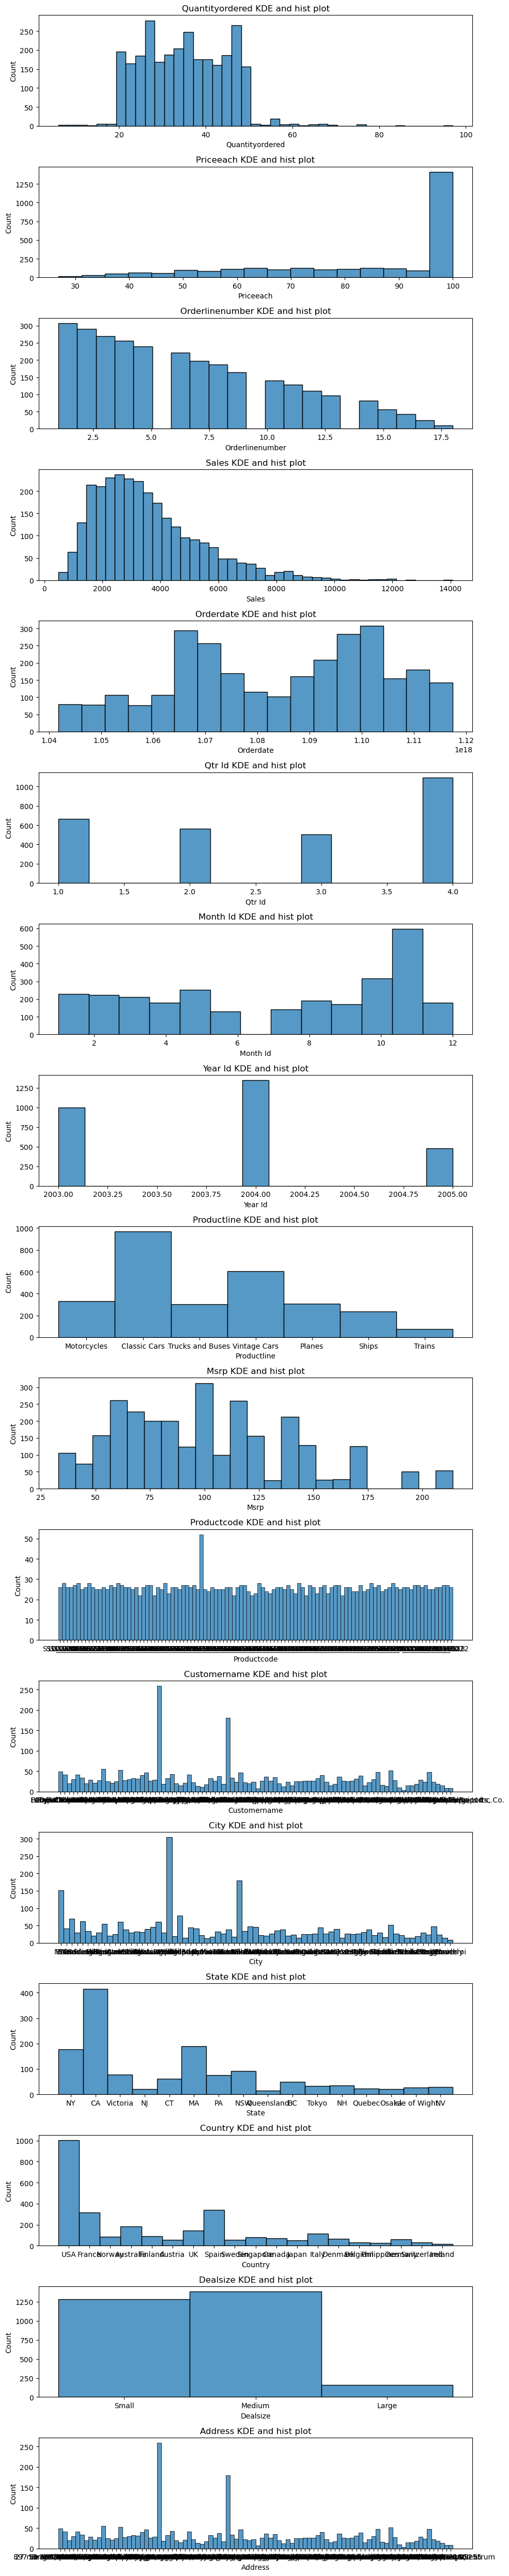

In [134]:
plt.figure(figsize=(10,50))

c1,c2 = sns.color_palette('Set2',2)

for i in range(len(df.columns)):
    plt.subplot(17,1,i+1)
    sns.histplot(df[df.columns[i]])
    plt.xlabel(' '.join(df.columns[i].split(sep='_')).title())
    plt.title(f"{' '.join(df.columns[i].split(sep='_')).title()} KDE and hist plot")

plt.tight_layout()